In [17]:
%matplotlib inline
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import math
import os
import numpy
import sys

plt.rcParams["figure.figsize"] =(10,5)
pd.options.display.max_rows = 2000
plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['font.family'] = 'cmu serif'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'


sns.set(rc={'text.usetex' : False})
sns.set_style("whitegrid")


sns.set_context('paper', font_scale=1)

In [97]:
def get_pareto_frontier(df, x, y, split, ascending=False):
    # removes all rows that don't lie on the pareto frontier
    to_plot = df.sort_values(y,ascending=ascending).reset_index(drop=True)
    d = {} # store last x values
    drop_list = []
    for algo in set(df[split]):
        d[algo] = 0
    for i in range(len(to_plot)):
        x_ = to_plot.iloc[i][x]
        y_ = to_plot.iloc[i][y]
        algo = to_plot.iloc[i][split]
        if x_ > d[algo]:
            d[algo] = x_
        else:
            drop_list.append(i)
    to_plot.drop(drop_list, inplace=True)

    return to_plot

df = pd.read_csv("T1/neurips21/t1.csv")

df['dslabel'] = df.apply(lambda row: row.dataset + str(row["count"]), axis = 1)
df['qps*buildtime'] = df.apply(lambda row: row.qps * row.build, axis = 1)

datasets = set(df.dataset)
algorithms = set(df.algorithm)
print(datasets)

{'deep-1B', 'text2image-1B', 'msturing-1B', 'msspacev-1B', 'random-xs', 'bigann-1B'}


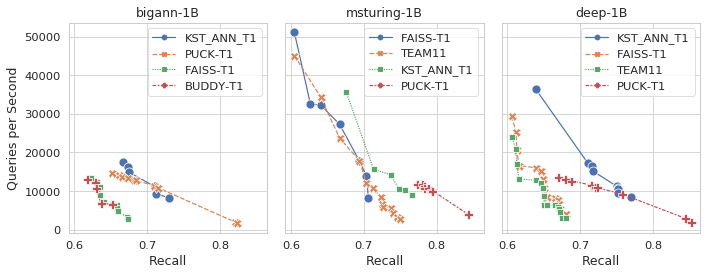

In [98]:
plt.rcParams["figure.figsize"] =(10,4)
sns.set_context('paper', font_scale=1.3)
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True)
for i, ds in enumerate(["bigann-1B", "msturing-1B", "deep-1B"]):
    test_df = df[(df.dataset == ds) & (df["count"] == 10)]
    test_df = get_pareto_frontier(test_df, "recall_ap", "qps", "algorithm", False)
    g = sns.lineplot(ax=axs[i], data=test_df[(test_df.recall_ap > 0.6) & (test_df.qps > 1000)], x="recall_ap", y="qps", style="algorithm", hue="algorithm", markers=True, ms=9)
    axs[i].set_title(ds)
    axs[i].minorticks_on()
    #axs[i].grid(which='minor', linestyle=':', linewidth=0.2, color='black')
    leg = axs[i].legend()
    for t in leg.texts:
    # truncate label text to 4 characters
        t.set_text(t.get_text().upper())
#plt.yscale('log')
axs[0].set(ylabel="Queries per Second")
axs[1].set(ylabel="Queries per Second")
axs[2].set(ylabel="")
axs[0].set(xlabel="Recall")
axs[1].set(xlabel="Recall")
axs[2].set(xlabel="Recall")



plt.tight_layout()
plt.savefig("t1.pdf", bbox_inches="tight")



{'ssnpp-1B', 'bigann-1B', 'text2image-1B', 'msspacev-1B'}


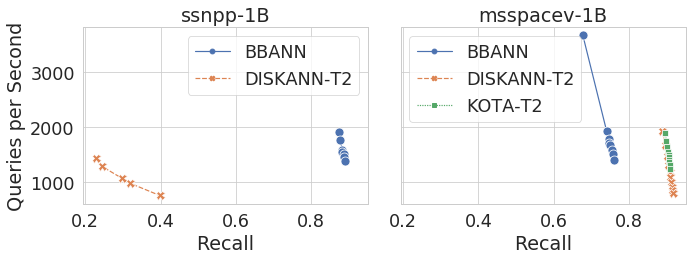

In [104]:
df = pd.read_csv("T2/neurips21/t2.csv")
datasets = set(df.dataset)
print(datasets)
plt.rcParams["figure.figsize"] =(10,4)
sns.set_context('paper', font_scale=1.7)
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True)
for i, ds in enumerate(["ssnpp-1B", "msspacev-1B"]):
    test_df = df[(df.dataset == ds)]
    test_df = get_pareto_frontier(test_df, "recall_ap", "qps", "algorithm", False)
    g = sns.lineplot(ax=axs[i], data=test_df, x="recall_ap", y="qps", style="algorithm", hue="algorithm", markers=True, ms=9)
    axs[i].set_title(ds)
    axs[i].minorticks_on()
    #axs[i].grid(which='minor', linestyle=':', linewidth=0.2, color='black')
    leg = axs[i].legend()
    for t in leg.texts:
    # truncate label text to 4 characters
        t.set_text(t.get_text().upper())
#plt.yscale('log')
axs[0].set(ylabel="Queries per Second")
axs[1].set(ylabel="Queries per Second")
#axs[2].set(ylabel="")
axs[0].set(xlabel="mAP")
axs[1].set(xlabel="Recall")
#axs[2].set(xlabel="Recall")



plt.tight_layout()
plt.savefig("t2.pdf", bbox_inches="tight")